# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


Pandas does not only let you group by a column name. In `df.groupby(grouper)` can be many things:

- Series (or string indicating a column in df)
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex



In [5]:
df.groupby(lambda x: x % 2).mean()

,data
0,10
1,10


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [6]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

In [8]:
# %load snippets/04b - Advanced groupby operations8.py

In [75]:
T = titles
decade = titles[['year']] // 10 * 10
T['decade'] = decade
T

,title,year,decade
0,The Rising Son,1990,1990
1,Ashes of Kukulcan,2016,2010
2,The Thousand Plane Raid,1969,1960
3,Crucea de piatra,1993,1990
4,The 86,2015,2010
...,...,...,...
215976,Le mouton noir,1922,1920
215977,Edge of the Unknown,2015,2010
215978,E yue,2005,2000
215979,Lakota Girls,2015,2010


<AxesSubplot:xlabel='decade'>

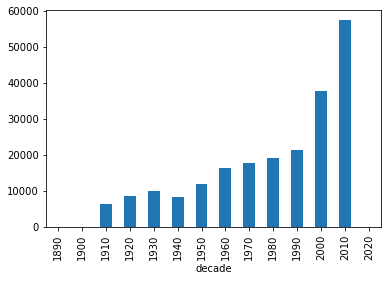

In [10]:
T.groupby('decade').size().plot(kind = 'bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

In [11]:
# %load snippets/04b - Advanced groupby operations9.py

<AxesSubplot:xlabel='decade'>

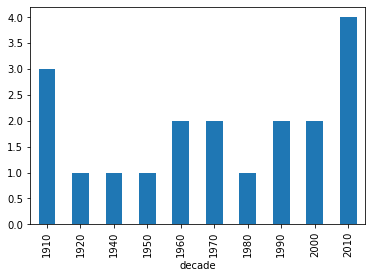

In [12]:
TH = T[T['title'] == 'Hamlet']
TH.groupby('decade').size().plot(kind = 'bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [13]:
# %load snippets/04b - Advanced groupby operations10.py

In [14]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960)][cast['n'] == 1].groupby('type')[['n']].sum()

#B = cast[(cast['year'] >= 1950) & (cast['year'] < 1960)][cast['n'] == 1]
#B.groupby('type')[['n']].sum()
#Provando ad dividere le righe ma il warning rimane

<ipython-input-14-5db0339ebe34>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast[(cast['year'] >= 1950) & (cast['year'] < 1960)][cast['n'] == 1].groupby('type')[['n']].sum()


,n
type,
actor,6388.0
actress,2813.0


<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [15]:
# %load snippets/04b - Advanced groupby operations11.py

In [16]:
c90 = cast[cast['year'] > 1990]
c90 = c90[c90['n'] == 1]
c90.groupby('name').size().nlargest(10)

name
Mohanlal              116
Mammootty             105
Akshay Kumar           87
Jayaram                74
Ajay Devgn             69
Andy Lau               68
Eric Roberts           67
Amitabh Bachchan       66
Dilip                  59
Nagarjuna Akkineni     59
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [17]:
# %load snippets/04b - Advanced groupby operations12.py

In [18]:
PP = cast[cast['title'] == 'The Pink Panther']
PP.groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [19]:
# %load snippets/04b - Advanced groupby operations13.py

In [20]:
o = cast[cast['name'] == 'Frank Oz']
z = o.groupby(['year', 'title']).size()
z[z > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [21]:
# %load snippets/04b - Advanced groupby operations15.py

In [22]:
q = o.groupby(['character']).size()
q[q > 1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [23]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [24]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [50]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [52]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [27]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [28]:
# %load snippets/04b - Advanced groupby operations21.py

In [68]:
cast['nr'] = cast.groupby('title')['n'].transform('max')


In [78]:
cast

,title,year,name,type,character,n,nr
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,45.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,9.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,NaN
...,...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0,55.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0,25.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0,33.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0,26.0


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.     
</div>

Tip: you can to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.

In [29]:
# %load snippets/04b - Advanced groupby operations22.py

In [30]:
# %load snippets/04b - Advanced groupby operations23.py

In [31]:
# %load snippets/04b - Advanced groupby operations24.py

In [84]:
#caricati dalle soluzioni
leading = cast[cast['n'] == 1]
sums_decade = leading.groupby([cast['year'] // 10 * 10, 'type']).size()
sums_decade

year  type   
1900  actor          5
      actress        1
1910  actor       2406
      actress     2753
1920  actor       4485
                 ...  
2000  actress     7537
2010  actor      17262
      actress     7384
2020  actor          3
      actress        1
Length: 26, dtype: int64

In [85]:
#sums_decade.groupby(level='year').transform(lambda x: x / x.sum())
ratios_decade = sums_decade / sums_decade.groupby(level='year').transform('sum')
ratios_decade

year  type   
1900  actor      0.833333
      actress    0.166667
1910  actor      0.466369
      actress    0.533631
1920  actor      0.598080
                   ...   
2000  actress    0.295464
2010  actor      0.700398
      actress    0.299602
2020  actor      0.750000
      actress    0.250000
Length: 26, dtype: float64

<AxesSubplot:xlabel='year'>

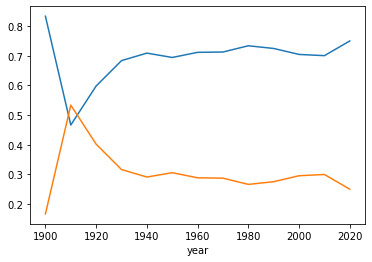

In [86]:
ratios_decade[:, 'actor'].plot()
ratios_decade[:, 'actress'].plot()

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [87]:
s = 'Bradwurst'

In [88]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [90]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])
s

0         Bradwurst
1    Kartoffelsalat
2        Sauerkraut
dtype: object

In [91]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet', and that start with 'Hamlet':
</div>

In [36]:
# %load snippets/04b - Advanced groupby operations29.py

In [37]:
# %load snippets/04b - Advanced groupby operations30.py

In [92]:
cast.head()

,title,year,name,type,character,n,nr
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,45.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,9.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,NaN


In [108]:
HH = cast[cast['title'] == 'Hamlet']
HH['title'].str.startswith('Hamlet')

#hamlets = titles[titles['title'].str.contains('Hamlet')]   #versione giusta
#hamlets['title'].value_counts()                            #versione giusta

#hamlets = titles[titles['title'].str.match('Hamlet')]     #str.match al posti di contains
#hamlets['title'].value_counts()

1456       True
6710       True
10274      True
10275      True
12743      True
           ... 
3212647    True
3236803    True
3257437    True
3284728    True
3304265    True
Name: title, Length: 299, dtype: bool

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 movie titles with the longest name.
</div>

In [38]:
# %load snippets/04b - Advanced groupby operations31.py

In [39]:
# %load snippets/04b - Advanced groupby operations32.py

In [141]:
TL = cast['title'].str.len().nlargest(10)
TL

#cast[cast['title'].str.len() > 50] #questa linea non funziona se aggiungo la fun .nlargest

1713325    208
1713326    208
1713327    208
2251078    208
2251079    208
2251080    208
2494269    196
30308      104
119923     104
299702     104
Name: title, dtype: int64

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [135]:
titles.title.value_counts().head()

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Blood Money             11
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [41]:
# %load snippets/04b - Advanced groupby operations34.py

In [145]:
titles.year.value_counts().head(1)

2015    13978
Name: year, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

In [42]:
# %load snippets/04b - Advanced groupby operations35.py

<AxesSubplot:>

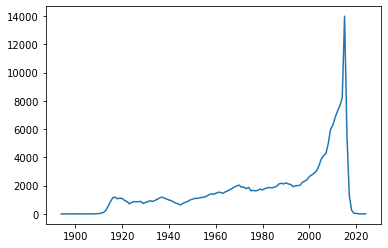

In [174]:
titles.year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

In [156]:
# %load snippets/04b - Advanced groupby operations36.py

In [161]:
TH.head()

,title,year,decade
5562,Hamlet,1948,1940
26160,Hamlet,2016,2010
37373,Hamlet,2015,2010
42224,Hamlet,1990,1990
43511,Hamlet,1910,1910


<AxesSubplot:>

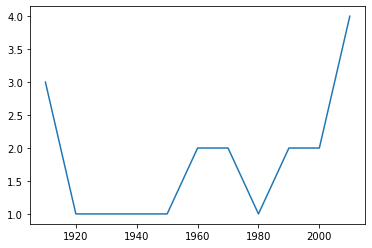

In [170]:
TH.decade.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [44]:
# %load snippets/04b - Advanced groupby operations37.py

In [171]:
cast.head()

,title,year,name,type,character,n,nr
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,45.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,9.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,NaN


In [175]:
cast.character.value_counts().head(11)

Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
               ...  
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: character, Length: 11, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [45]:
# %load snippets/04b - Advanced groupby operations38.py

In [182]:
Y2010F = cast[(cast['year'] == 2010) & (cast['type'] == 'actress')]    #ho letto solo attrici e non anche attori
Y2010F.name.value_counts()

Debbie Rochon             13
Anushka Shetty            12
Priyamani                 11
Kimberly Lynn Campbell    10
Cynthia LeBlanc           10
                          ..
Lakshmi Priya              1
Elizabeth Rainer           1
Cat Tomeny                 1
Sandrine Andr?             1
Alyne Piltaver             1
Name: name, Length: 33474, dtype: int64

In [212]:
Y2010 = cast[cast['year'] == 2010]
Y2010.name.value_counts()

Lloyd Kaufman              23
Jagathi Sreekumar          20
Chris (II) Eddy            20
Suraaj Venjarammoodu       20
Danny Trejo                17
                           ..
Meghann Ashley              1
Jim (III) Norris            1
Karen (III) Gonzalez        1
Juan Carlos (IX) Garc?a     1
Alyne Piltaver              1
Name: name, Length: 93771, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

In [46]:
# %load snippets/04b - Advanced groupby operations39.py

<AxesSubplot:>

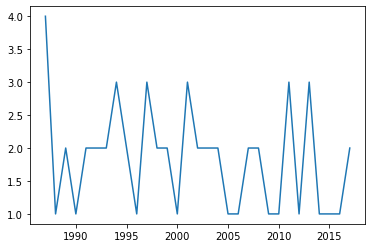

In [189]:
BP = cast[cast['name'] == 'Brad Pitt']
BP.year.value_counts().sort_index().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [47]:
# %load snippets/04b - Advanced groupby operations40.py

In [220]:
TL = cast[cast['title'].str.startswith('The Life')]
TL.title.value_counts().head(10)

The Life of David Gale                      137
The Life Aquatic with Steve Zissou           78
The Life Before Her Eyes                     74
The Life of Riley                            73
The Life and Death of Peter Sellers          65
The Life and Death of Colonel Blimp          58
The Life and Hard Times of Guy Terrifico     53
The Life and Times of Judge Roy Bean         50
The Life of Emile Zola                       46
The Life of the Party                        45
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>



In [ ]:
# %load snippets/04b - Advanced groupby operations41.py

In [49]:
# %load snippets/04b - Advanced groupby operations42.py

In [237]:
AM50 = cast
AM50 = AM50[AM50.n == 1]
AM50 = AM50[AM50.type == 'actor']
AM50 = AM50[AM50['year'] // 10 == 195]
AM50.type.value_counts()

actor    6388
Name: type, dtype: int64

In [239]:
AF00 = cast
AF00 = AF00[AF00.n == 1]
AF00 = AF00[AF00.type == 'actress']
AF00 = AF00[AF00['year'] // 10 == 200]
AF00.type.value_counts()

actress    7537
Name: type, dtype: int64